In [1]:
# Locate your directory for saving the images first.
# use a loop to update the file_name autometically
import os

folder_location= 'C:\\Users\\Hp\\Desktop\\ICONIP\\figs'
file_name = "Fig01-0857.pdf"
file_path_figs = os.path.join(folder_location, file_name)

In [2]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import csv 
import numpy as np 
import pandas as pd 

all_data_file_path= 'G:/fuzzy signature code/fuzzy-20220829T042646Z-001/fuzzy/sumuru_code_data/WRAO/data/SARS/input.csv'
covid_data_file_path = 'data/covid_fuzzy_new_temph_bph_v4.csv'   



features = ['temp1_s','temp1_m','temp1_h',
            'temp2_s','temp2_m','temp2_h',
            'temp3_s','temp3_m','temp3_h',
            'temp4_s','temp4_m','temp4_h',
            'bps_s' , 'bps_m' , 'bps_h',
            'bpd_s', 'bpd_m' , 'bpd_h',]
#             'nausea_s' , 'nausea_m' , 'nause_h']

 
n = len(features)
df_all = pd.read_csv(all_data_file_path, header=None , names = features ,usecols = [i for i in range(n)])
INPUT_FEATURES = len(features)
#df_all.head()

In [3]:
# Def basic aggreagation functions 
def AV (row):
    return row.average() 
def MX (row):
    return row.max()
def MN (row):
    return row.min()
def AM (row):
    return (MX(row) + AV(row)) / 2 

def aggregate(row, op):
    if op == 'AV':
        return sum(row) / len (row)
    elif op == 'MX':
        return max(row)
    elif op == 'MN':
        return min(row)
    elif op == 'AM':
        return  (sum(row) / len (row) + max(row)) / 2 

In [5]:

def fuzzy_signature_aggregation_first_paper (row_data):
    # row_data_temp = [0,0,0,0]  + row_data[-6:]
    row_data_temp = [0,0,0,0]  + [0,0]

    # temp level3 
    row_data_temp[0] = aggregate(row_data[0:3]  ,"MX" )
    row_data_temp[1] = aggregate(row_data[3:6]  ,"MX" )
    row_data_temp[2] = aggregate(row_data[6:9]  ,"MX" )
    row_data_temp[3] = aggregate(row_data[9:12] ,"MX" )
    # bp level 3 
    row_data_temp[4] = aggregate(row_data[12:15] ,"MX" )
    row_data_temp[5] = aggregate(row_data[15:18] ,"MX" )
    
    row_data_temp_level2 = [0,0]
 
    row_data_temp_level2[0] = aggregate(row_data_temp[0:4] , "MX")
    row_data_temp_level2[1] = aggregate(row_data_temp[4:8] , "MX")
    
    final_output = 0 

    final_output = aggregate(row_data_temp_level2 , "MN")
    
    return final_output 

In [6]:

df_all_fuzzy = df_all.copy()

col_name = "signature_aggregation"
df_all_fuzzy[col_name] = df_all.apply(lambda row: fuzzy_signature_aggregation_first_paper(row),  axis=1 )
#df_all_fuzzy.describe()

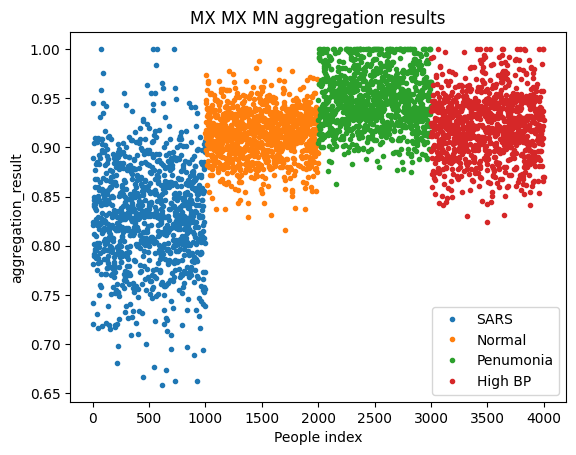

In [7]:

import matplotlib.pyplot as plt
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

l = list(df_all_fuzzy["signature_aggregation"])
len(l)
plt.plot(range(0,1000), l[:1000], '.' , label='SARS')
plt.plot(range(1000,2000),l[1000:2000] ,'.', label='Normal')
plt.plot(range(2000,3000),l[2000:3000] ,'.', label='Penumonia')
plt.plot(range(3000,4000),l[3000:4000] ,'.', label='High BP')
plt.legend()
plt.ylabel('aggregation_result')
plt.xlabel('People index')
plt.title("MX MX MN aggregation results")
plt.show()

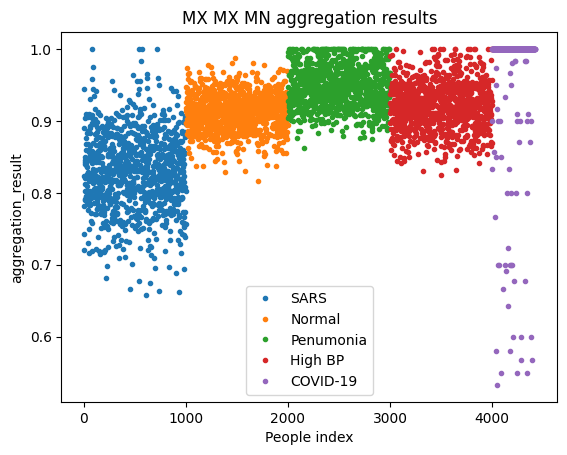

In [8]:
#1 load data 
covid_data = pd.read_csv(covid_data_file_path, index_col=0)
covid_data = covid_data.loc[:,'temp1_s':]
#2 convert to fuzzy set 
pass 
#3 calculate the aggregation
covid_data_fuzzy = covid_data.copy()
covid_data_fuzzy[col_name] = covid_data.apply(lambda row: fuzzy_signature_aggregation_first_paper(row),  axis=1 )

#4 merge the covid data and the sars data 
df_all_with_covid = pd.concat([df_all_fuzzy,covid_data_fuzzy])

#4 plot 
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
l = list(df_all_with_covid["signature_aggregation"])
len(l)
plt.plot(range(0,1000), l[:1000], '.' , label='SARS')
plt.plot(range(1000,2000),l[1000:2000] ,'.', label='Normal')
plt.plot(range(2000,3000),l[2000:3000] ,'.', label='Penumonia')
plt.plot(range(3000,4000),l[3000:4000] ,'.', label='High BP')
plt.plot(range(4000,4421),l[4000:4421] ,'.', label='COVID-19')
plt.legend()
plt.ylabel('aggregation_result')
plt.xlabel('People index')
plt.title("MX MX MN aggregation results")
# plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0)                # added 
plt.show()

In [9]:
def fuzzy_signature_aggregation (row_data , aggregation):
    # row_data_temp = [0,0,0,0]  + row_data[-6:]
    row_data_temp = [0,0,0,0]  + [0,0]
    level_3_op = aggregation[2] 
    # temp level3 
    row_data_temp[0] = aggregate(row_data[0:3]  ,level_3_op )
    row_data_temp[1] = aggregate(row_data[3:6]  ,level_3_op )
    row_data_temp[2] = aggregate(row_data[6:9]  ,level_3_op )
    row_data_temp[3] = aggregate(row_data[9:12] ,level_3_op )
    # bp level 3 
    row_data_temp[4] = aggregate(row_data[12:15] ,level_3_op )
    row_data_temp[5] = aggregate(row_data[15:18] ,level_3_op )
    
    row_data_temp_level2 = [0,0]
    level_2_op = aggregation[1] 
    row_data_temp_level2[0] = aggregate(row_data_temp[0:4] , level_2_op)
    row_data_temp_level2[1] = aggregate(row_data_temp[4:8] , level_2_op)
    
    final_output = 0 
    level_1_op = aggregation[0] 
    final_output = aggregate(row_data_temp_level2 , level_1_op)
    
    return final_output

In [10]:
import itertools
x = ['AV', 'MN' ,'MX', 'AM']
perm = [ (p[2] , p[1], p[0]) for p in itertools.product(x, repeat=3)]

for i in list(perm):
    col_name = '_'.join(i)
    df_all_fuzzy[col_name] = df_all.apply(lambda row: fuzzy_signature_aggregation(row , i ),  axis=1 )
    covid_data_fuzzy[col_name] = covid_data.apply(lambda row: fuzzy_signature_aggregation(row , i ),  axis=1 )

In [11]:
df_s_fuzzy= df_all_fuzzy.head(1000)
df_n_fuzzy= df_all_fuzzy.iloc[1000:2000]
df_penumonia_fuzzy= df_all_fuzzy.iloc[2000:3000]
df_highbp_fuzzy= df_all_fuzzy.iloc[3000:4000]

df_s_fuzzy_only = df_s_fuzzy.loc[:,'AV_AV_AV':]
index_ordered = df_s_fuzzy_only.mean().sort_values( ascending=False).index
df_s_fuzzy_only = df_s_fuzzy_only.reindex(index_ordered, axis=1 )
df_s_fuzzy_only = df_s_fuzzy_only.round(4)
df_s_fuzzy_only.to_csv('data/fuzzy_aggregated_sars_v2.csv' , index=None)

df_n_fuzzy_only = df_n_fuzzy.loc[:,'AV_AV_AV':]
df_highbp_fuzzy_only = df_highbp_fuzzy.loc[:,'AV_AV_AV':]
df_penumonia_fuzzy_only = df_penumonia_fuzzy.loc[:,'AV_AV_AV':]

df_n_fuzzy_only = df_n_fuzzy_only.reindex(index_ordered, axis=1 )
df_n_fuzzy_only = df_n_fuzzy_only.round(4)
df_n_fuzzy_only.to_csv('data/fuzzy_aggregated_normal_v2.csv' , index=None)

df_highbp_fuzzy_only=df_highbp_fuzzy_only.reindex(index_ordered, axis=1)
df_highbp_fuzzy_only=df_highbp_fuzzy_only.round(4)
df_highbp_fuzzy_only.to_csv('data/fuzzy_aggregated_highbp_v2.csv' , index=None)

df_penumonia_fuzzy_only=df_penumonia_fuzzy_only.reindex(index_ordered, axis=1)
df_penumonia_fuzzy_only=df_penumonia_fuzzy_only.round(4)
df_penumonia_fuzzy_only.to_csv('data/fuzzy_aggregated_penumonia_v2.csv' , index=None)

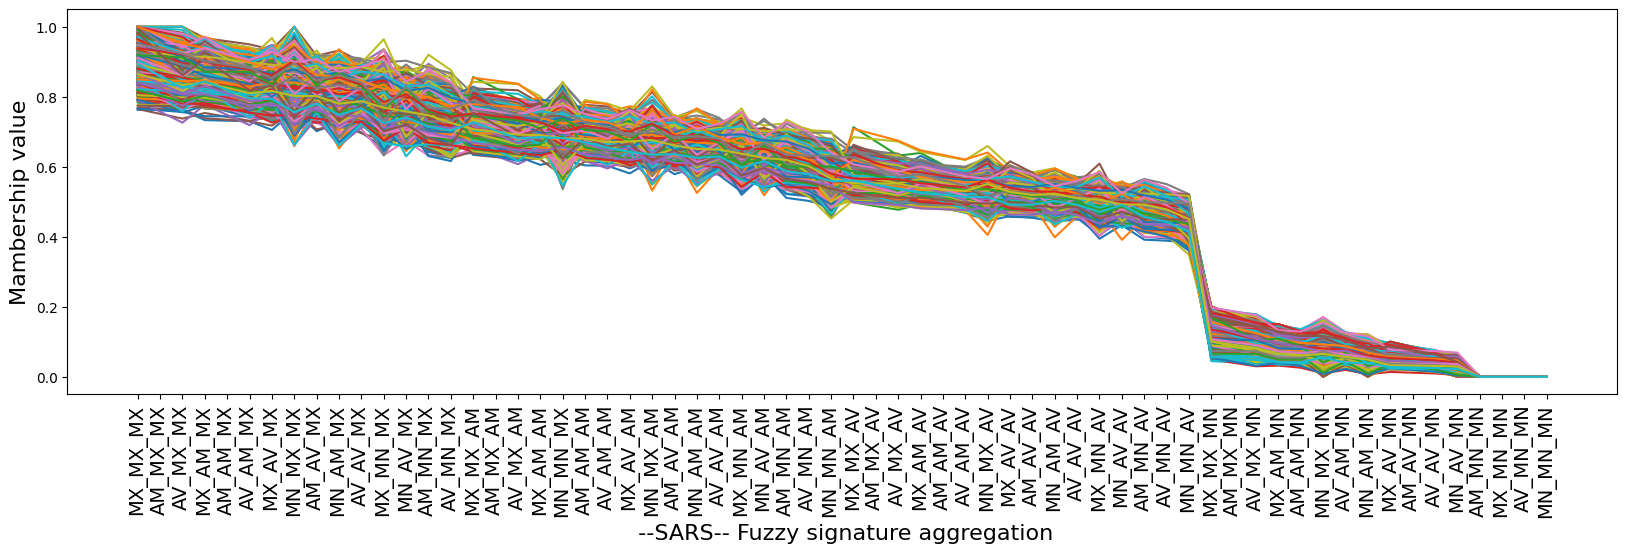

In [13]:
#plot df_s

import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import matplotlib.pyplot as plt

plt.figure()
x = [i+1 for i in range(64)] 
for i in range(1000):
    y = list(df_s_fuzzy_only.iloc[i,:])
    plt.plot(x , y)
    
# plt.legend()
plt.xlabel(' --SARS-- Fuzzy signature aggregation', fontsize=16)
plt.ylabel('Mambership value', fontsize=16)
plt.xticks(x, index_ordered, rotation ='vertical', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
# plt.savefig(file_path, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0) 
plt.show()

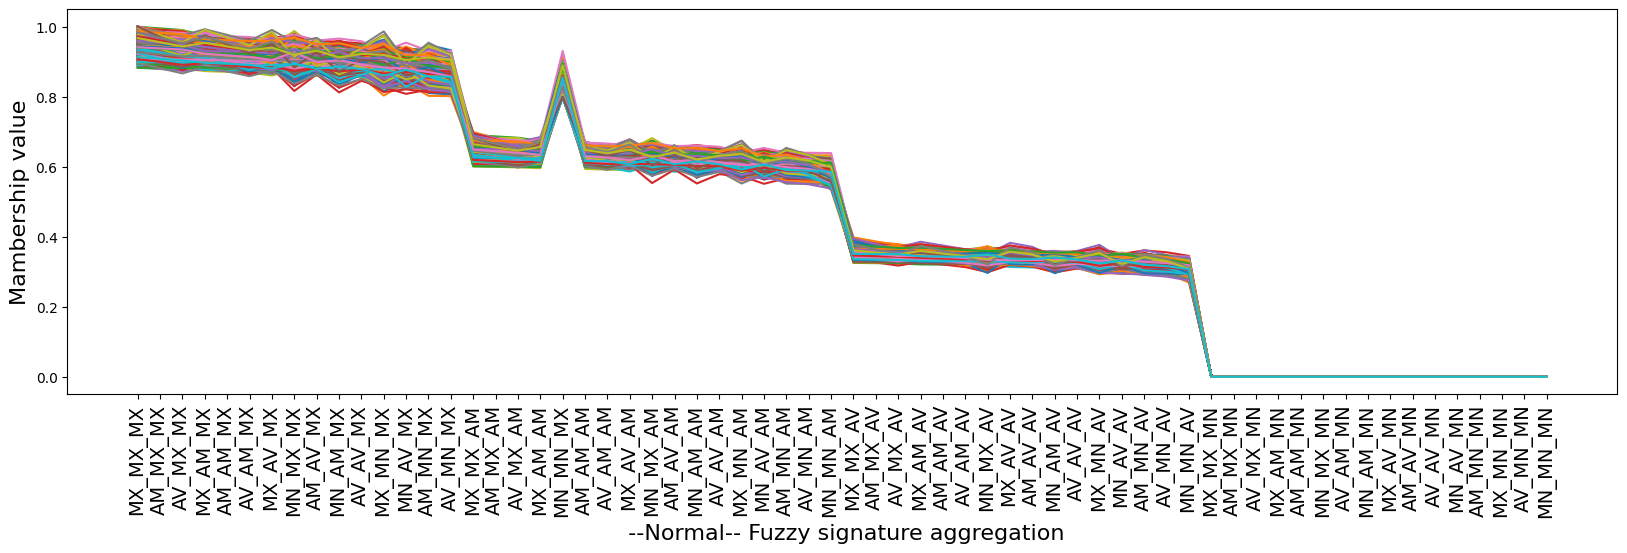

In [14]:


import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import matplotlib.pyplot as plt

plt.figure()
x = [i+1 for i in range(64)] 
for i in range(1000):
    y = list(df_n_fuzzy_only.iloc[i,:])
    plt.plot(x , y)
    
# plt.legend()
plt.xlabel(' --Normal-- Fuzzy signature aggregation', fontsize=16)
plt.ylabel('Mambership value', fontsize=16)
plt.xticks(x, index_ordered, rotation ='vertical',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
# plt.savefig(file_path, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0) 
plt.show()

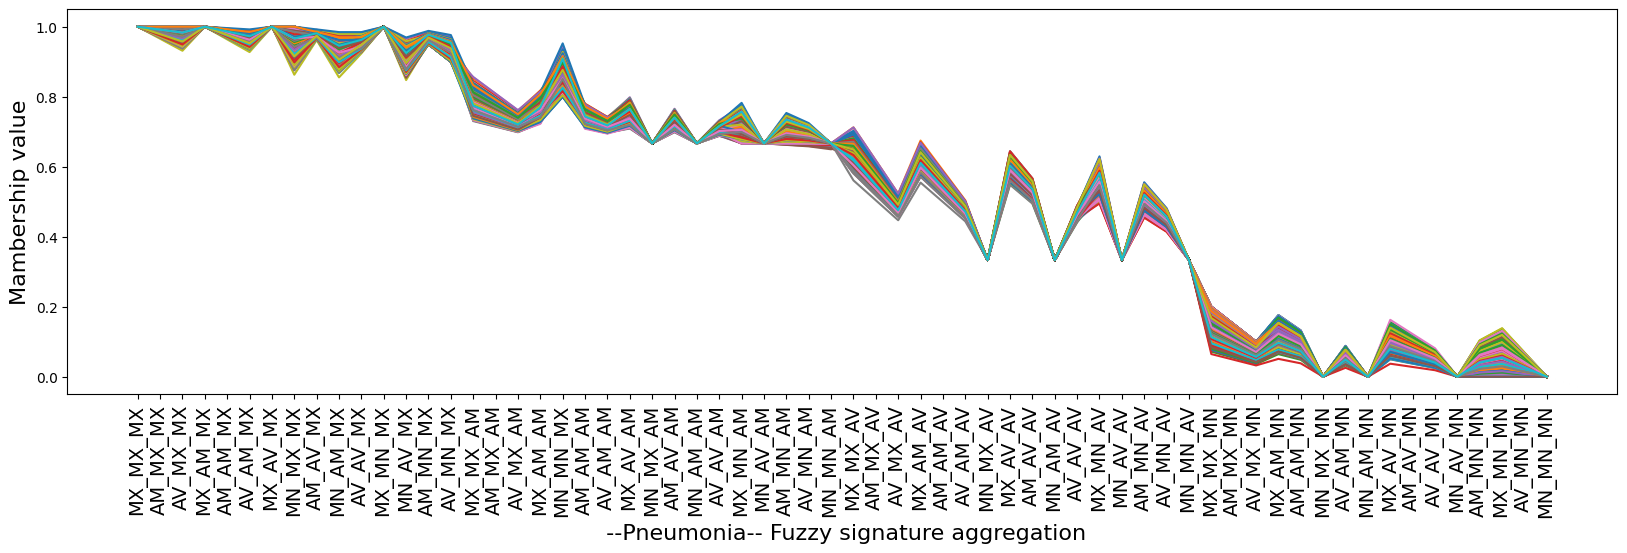

In [15]:


import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import matplotlib.pyplot as plt

plt.figure()
x = [i+1 for i in range(64)] 
for i in range(1000):
    y = list(df_penumonia_fuzzy_only.iloc[i,:])
    plt.plot(x , y)
    
# plt.legend()
plt.xlabel(' --Pneumonia-- Fuzzy signature aggregation',fontsize=16 )
plt.ylabel('Mambership value', fontsize= 16)
plt.xticks(x, index_ordered, rotation ='vertical',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
# plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

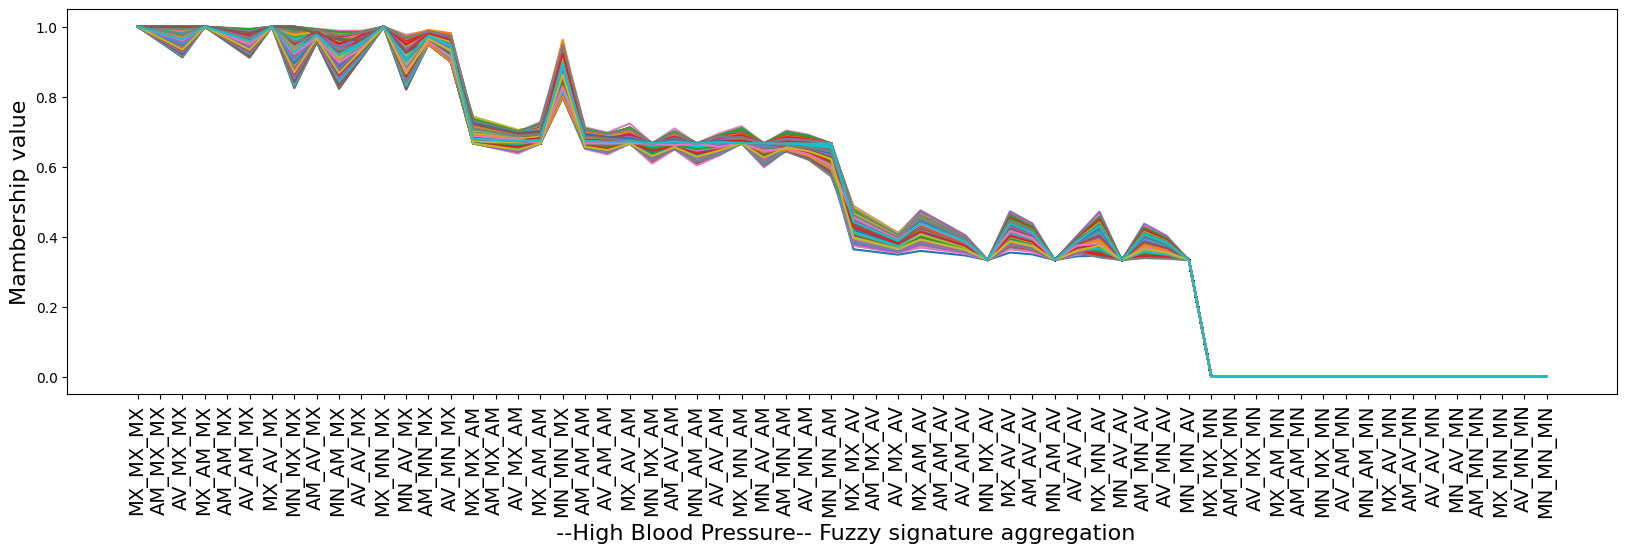

In [16]:


import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import matplotlib.pyplot as plt

plt.figure()
x = [i+1 for i in range(64)] 
for i in range(1000):
    y = list(df_highbp_fuzzy_only.iloc[i,:])
    plt.plot(x , y)
    
# plt.legend()
plt.xlabel(' --High Blood Pressure-- Fuzzy signature aggregation',fontsize=16 )
plt.ylabel('Mambership value', fontsize= 16)
plt.xticks(x, index_ordered, rotation ='vertical',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
# plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

In [17]:
covid_data_fuzzy_only=covid_data_fuzzy.loc[:,'AV_AV_AV':]
covid_data_fuzzy_only = covid_data_fuzzy_only.reindex(index_ordered, axis=1 )
covid_data_fuzzy_only = covid_data_fuzzy_only.round(4)
covid_data_fuzzy_only.to_csv('data/fuzzy_aggregated_covid_v2.csv' , index=None)


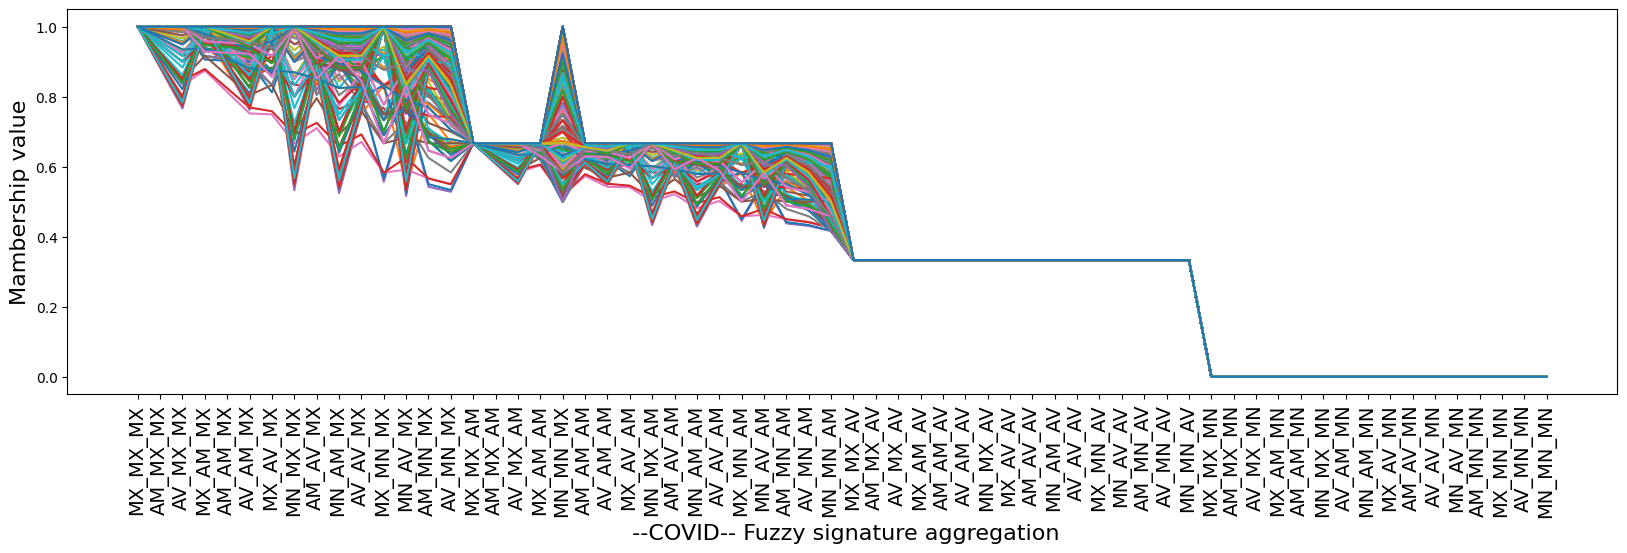

In [18]:


import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'


import matplotlib.pyplot as plt

plt.figure()
x = [i+1 for i in range(64)] 
for i in range(421):
    y = list(covid_data_fuzzy_only.iloc[i,:])
    plt.plot(x , y)
    
# plt.legend()
plt.xlabel(' --COVID-- Fuzzy signature aggregation', fontsize=16)
plt.ylabel('Mambership value', fontsize=16)
plt.xticks(x, index_ordered, rotation ='vertical',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
# plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

In [19]:

import math

def distance_two_point(p1 , p2): 
    return round( (p2-p1) * (p2-p1) , 4 ) 
def distance_calculator(lst1 , lst2): 
    lst1_sorted = sorted(lst1)
    lst2_sorted = sorted(lst2)
    dst = 0 
    for i in range(len(lst1_sorted)):
        d = distance_two_point(lst1_sorted[i] ,lst2_sorted[i] )
        dst += d 
    return math.sqrt(dst)

In [20]:
# quick test 
ta = [1,2,3,4,5]
tb = [6,3,4,5,-1]
print (distance_calculator(ta,tb))

2.8284271247461903


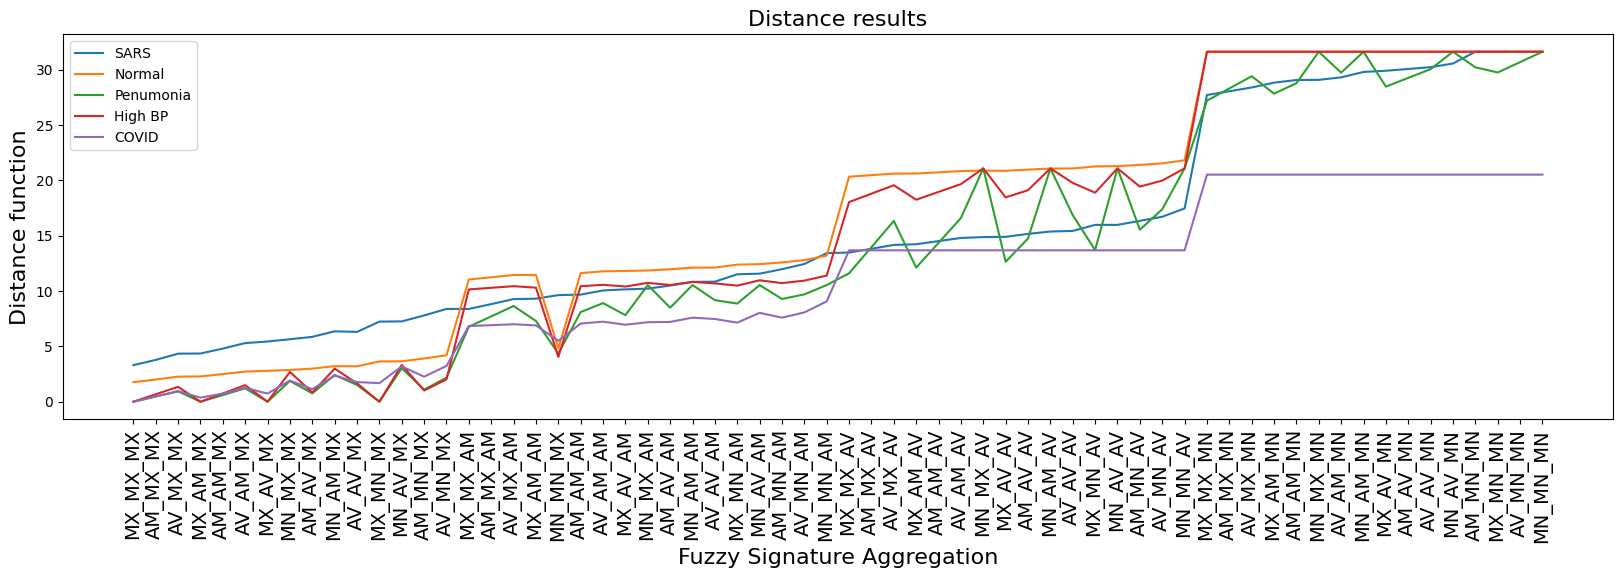

In [21]:
#distance calculation

lst_sars = []
lst_normal = [] 
lst_pneumonia = [] 
lst_HBP = [] 
lst_covid = []
 
for i in range(64):
    sars_agg = list(df_s_fuzzy_only.iloc[:,i])
    normal_agg = list(df_n_fuzzy_only.iloc[:,i])
    penumonia_agg = list(df_penumonia_fuzzy_only.iloc[:,i])
    highbp_agg = list(df_highbp_fuzzy_only.iloc[:,i])
    covid_agg = list(covid_data_fuzzy_only.iloc[:,i])
    
    temp_s = distance_calculator(list(np.ones(len(sars_agg))),sars_agg)
    lst_sars.append(round(temp_s,5))
    temp_n = distance_calculator(list(np.ones(len(sars_agg))),normal_agg)
    lst_normal.append(round(temp_n,5))
    temp_pne = distance_calculator(list(np.ones(len(sars_agg))),penumonia_agg)
    lst_pneumonia.append(round(temp_pne,5))
    temp_HBP = distance_calculator(list(np.ones(len(sars_agg))),highbp_agg)
    lst_HBP.append(round(temp_HBP,5))
    temp_covid = distance_calculator(list(np.ones(len(covid_agg))),covid_agg)
    lst_covid.append(round(temp_covid,5))

# plot all the distances

plt.plot(range(64),lst_sars,label='SARS')
plt.plot(range(64),lst_normal,label='Normal')
plt.plot(range(64),lst_pneumonia, label='Penumonia')
plt.plot(range(64),lst_HBP, label='High BP')
plt.plot(range(64),lst_covid, label='COVID')
plt.legend()
plt.ylabel('Distance function', fontsize= 16)
plt.xlabel('Fuzzy Signature Aggregation', fontsize= 16)
plt.title("Distance results", fontsize= 16)
plt.xticks(range(64), index_ordered, rotation ='vertical',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
# plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

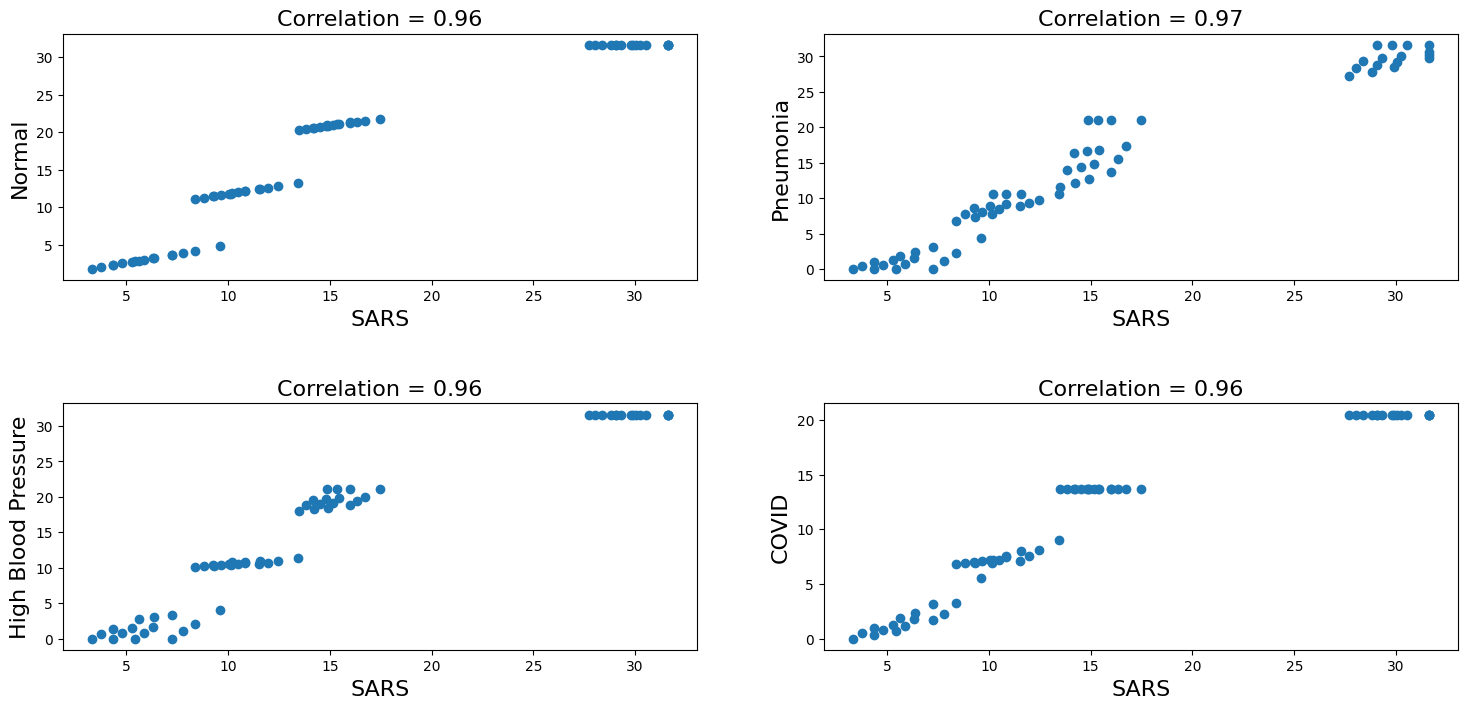

In [22]:

r1=np.corrcoef(lst_sars,lst_normal)
r2=np.corrcoef(lst_sars,lst_pneumonia)
r3=np.corrcoef(lst_sars,lst_HBP)
r4=np.corrcoef(lst_sars,lst_covid)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
ax[0,0].scatter(lst_sars,lst_normal)
ax[0,0].set_title('Correlation = ' + "{:.2f}".format(r1[0,1]), fontsize=16)
# ax[0,0].set(xlabel='SARS',ylabel='Normal',fontsize=16)
ax[0, 0].set_xlabel('SARS', fontsize=16)
ax[0, 0].set_ylabel('Normal', fontsize=16)

ax[0,1].scatter(lst_sars,lst_pneumonia)
ax[0,1].set_title('Correlation = ' + "{:.2f}".format(r2[0,1]),fontsize=16)
# ax[0,1].set(xlabel='SARS',ylabel='Pneumonia',fontsize=16)
ax[0, 1].set_xlabel('SARS', fontsize=16)
ax[0, 1].set_ylabel('Pneumonia', fontsize=16)

ax[1,0].scatter(lst_sars,lst_HBP)
ax[1,0].set_title('Correlation = ' + "{:.2f}".format(r3[0,1]), fontsize=16)
# ax[1,0].set(xlabel='SARS',ylabel='High Blood Pressure', fontsize=16)
ax[1, 0].set_xlabel('SARS', fontsize=16)
ax[1, 0].set_ylabel('High Blood Pressure', fontsize=16)

ax[1,1].scatter(lst_sars,lst_covid)
ax[1,1].set_title('Correlation = ' + "{:.2f}".format(r3[0,1]), fontsize=16)
# ax[1,1].set(xlabel='SARS',ylabel='COVID', fontsize=16)
ax[1, 1].set_xlabel('SARS', fontsize=16)
ax[1, 1].set_ylabel('COVID', fontsize=16)

fig.subplots_adjust(hspace=0.5)
# plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()


In [23]:
from mlxtend.evaluate import permutation_test

pvalue1=[]
pvalue2=[]
pvalue3=[]
pvalue4=[]
pvalue5=[]
pvalue6=[]
pvalue7=[]

for i in range(64):

    p_value = permutation_test(df_s_fuzzy_only.iloc[:,i], df_n_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue1.append(p_value)
    
    p_value = permutation_test(df_s_fuzzy_only.iloc[:,i], df_penumonia_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue2.append(p_value)
    
    p_value = permutation_test(df_s_fuzzy_only.iloc[:,i], df_highbp_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue3.append(p_value)
    
    p_value = permutation_test(df_s_fuzzy_only.iloc[:,i], covid_data_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue4.append(p_value)
    
    p_value = permutation_test(df_n_fuzzy_only.iloc[:,i], df_penumonia_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue5.append(p_value)
    
    p_value = permutation_test(df_n_fuzzy_only.iloc[:,i], df_highbp_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue6.append(p_value)
    
    p_value = permutation_test(df_n_fuzzy_only.iloc[:,i], covid_data_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue7.append(p_value)

In [24]:
pvalue8=[]
pvalue9=[]
pvalue10=[]

for i in range(64):
    
    p_value = permutation_test(df_penumonia_fuzzy_only.iloc[:,i], df_highbp_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue8.append(p_value)
    
    p_value = permutation_test(df_penumonia_fuzzy_only.iloc[:,i], covid_data_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue9.append(p_value)
    
    p_value = permutation_test(df_highbp_fuzzy_only.iloc[:,i], covid_data_fuzzy_only.iloc[:,i],
                               method='approximate', num_rounds=10000, seed=0)
    pvalue10.append(p_value)

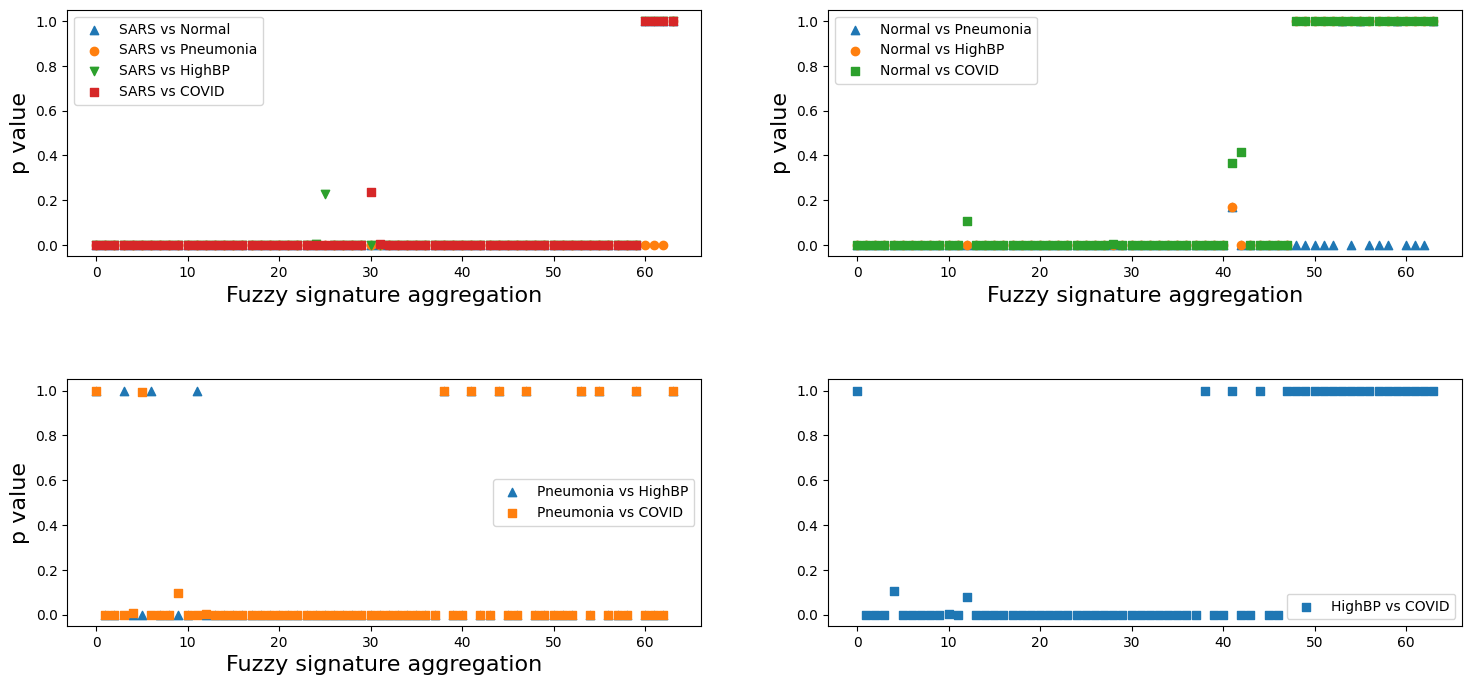

In [26]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
ax[0,0].scatter(range(64),pvalue1,label='SARS vs Normal',marker='^')
ax[0,0].scatter(range(64),pvalue2,label='SARS vs Pneumonia',marker='o')
ax[0,0].scatter(range(64),pvalue3,label='SARS vs HighBP',marker='v')
ax[0,0].scatter(range(64),pvalue4, label='SARS vs COVID',marker='s')
# ax[0,0].set(xlabel='Fuzzy signature aggregation',ylabel='p value')
ax[0, 0].set_xlabel('Fuzzy signature aggregation', fontsize=16)
ax[0, 0].set_ylabel('p value', fontsize=16)
ax[0,0].legend()

ax[0,1].scatter(range(64),pvalue5,label='Normal vs Pneumonia',marker='^')
ax[0,1].scatter(range(64),pvalue6,label='Normal vs HighBP',marker='o')
ax[0,1].scatter(range(64),pvalue7, label='Normal vs COVID',marker='s')
# ax[0,1].set(xlabel='Fuzzy signature aggregation',ylabel='p value')
ax[0, 1].set_xlabel('Fuzzy signature aggregation', fontsize=16)
ax[0, 1].set_ylabel('p value', fontsize=16)
ax[0,1].legend()

ax[1,0].scatter(range(64),pvalue8,label='Pneumonia vs HighBP',marker='^')
ax[1,0].scatter(range(64),pvalue9, label='Pneumonia vs COVID',marker='s')
# ax[1,0].set(xlabel='Fuzzy signature aggregation',ylabel='p value')
ax[1, 0].set_xlabel('Fuzzy signature aggregation', fontsize=16)
ax[1, 0].set_ylabel('p value', fontsize=16)
ax[1,0].legend()

ax[1,1].scatter(range(64),pvalue10, label='HighBP vs COVID',marker='s')
# ax[1,1].set(xlabel='Fuzzy signature aggregation',ylabel='p value')
ax[0, 0].set_xlabel('Fuzzy signature aggregation', fontsize=16)
ax[0, 0].set_ylabel('p value', fontsize=16)
ax[1,1].legend()

fig.subplots_adjust(hspace=0.5)
# plt.savefig(file_path, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0) 
plt.show()

In [27]:
# Implementation of KNN algorithm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



test_set_score=[]
training_set_score=[]

def df_to_train_lst (df , y_label):
    X = [[round(i,4)] for i in list(df)]
    y = [ y_label for i in list(df)]
    return (X , y)

for i in range(64):

    normal_agg = df_n_fuzzy_only.iloc[:,i]
    sars_agg = df_s_fuzzy_only.iloc[:,i]
    highbp_agg = df_highbp_fuzzy_only.iloc[:,i]
    penumonia_agg = df_penumonia_fuzzy_only.iloc[:,i]
    cvoid_data_fuzzy_agg = covid_data_fuzzy_only.iloc[:,i]



    normal_agg_X           , normal_agg_y           = df_to_train_lst(normal_agg , 0)
    sars_agg_X             , sars_agg_y             = df_to_train_lst(sars_agg , 1)
    highbp_agg_X           , highbp_agg_y           = df_to_train_lst(highbp_agg , 2)
    penumonia_agg_X        , penumonia_agg_y        = df_to_train_lst(penumonia_agg , 3)
    cvoid_data_fuzzy_agg_X , cvoid_data_fuzzy_agg_y = df_to_train_lst(cvoid_data_fuzzy_agg , 4)

    X = normal_agg_X + sars_agg_X + highbp_agg_X + penumonia_agg_X + cvoid_data_fuzzy_agg_X
    y = normal_agg_y + sars_agg_y + highbp_agg_y + penumonia_agg_y + cvoid_data_fuzzy_agg_y

    assert (X.__len__() == y.__len__())

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

    n_neighbors = 5 
    neigh = KNeighborsClassifier(n_neighbors)
    neigh.fit(X_train, y_train)

    # get training set score 
    pred_train = neigh.predict(X_train)
    acc_train = accuracy_score(y_train, pred_train)
    acc_train = round (acc_train , 4)
    #print ("Accuracy on train set: " + str(acc_train))
    training_set_score.append(acc_train)

    # get test set score 
    pred_test = neigh.predict(X_test)
    acc_test = accuracy_score(y_test, pred_test)
    acc_test = round (acc_test , 4)
    #print ("Accuracy on test set: " + str(acc_test))
    test_set_score.append(acc_test)

print( test_set_score)
print( training_set_score)

[0.538, 0.6299, 0.6045, 0.6073, 0.684, 0.6813, 0.6326, 0.4462, 0.7114, 0.5175, 0.7101, 0.6313, 0.5579, 0.7087, 0.7286, 0.6648, 0.6977, 0.7293, 0.7293, 0.5648, 0.7567, 0.7258, 0.7567, 0.5497, 0.7368, 0.6066, 0.6902, 0.6861, 0.4688, 0.7128, 0.7121, 0.6868, 0.9246, 0.7951, 0.9596, 0.9698, 0.8074, 0.9746, 0.6929, 0.9685, 0.828, 0.6785, 0.976, 0.9246, 0.6923, 0.8513, 0.8677, 0.6895, 0.4894, 0.4736, 0.584, 0.5517, 0.4839, 0.4421, 0.5065, 0.4483, 0.6093, 0.5936, 0.4791, 0.44, 0.4407, 0.4565, 0.4256, 0.2324]
[0.5652, 0.7208, 0.7039, 0.6148, 0.761, 0.7525, 0.6533, 0.6026, 0.7937, 0.6634, 0.7873, 0.657, 0.6685, 0.8032, 0.8059, 0.736, 0.7934, 0.7907, 0.7917, 0.6968, 0.8055, 0.7836, 0.7914, 0.5682, 0.8099, 0.7083, 0.7792, 0.7576, 0.5571, 0.7853, 0.7897, 0.7424, 0.9429, 0.867, 0.9639, 0.9713, 0.8714, 0.9791, 0.6712, 0.9801, 0.8876, 0.6772, 0.9777, 0.9399, 0.6705, 0.8842, 0.9038, 0.6725, 0.5496, 0.5567, 0.5993, 0.5979, 0.5409, 0.4551, 0.5719, 0.4521, 0.6472, 0.605, 0.5469, 0.4561, 0.451, 0.4433, 0.4

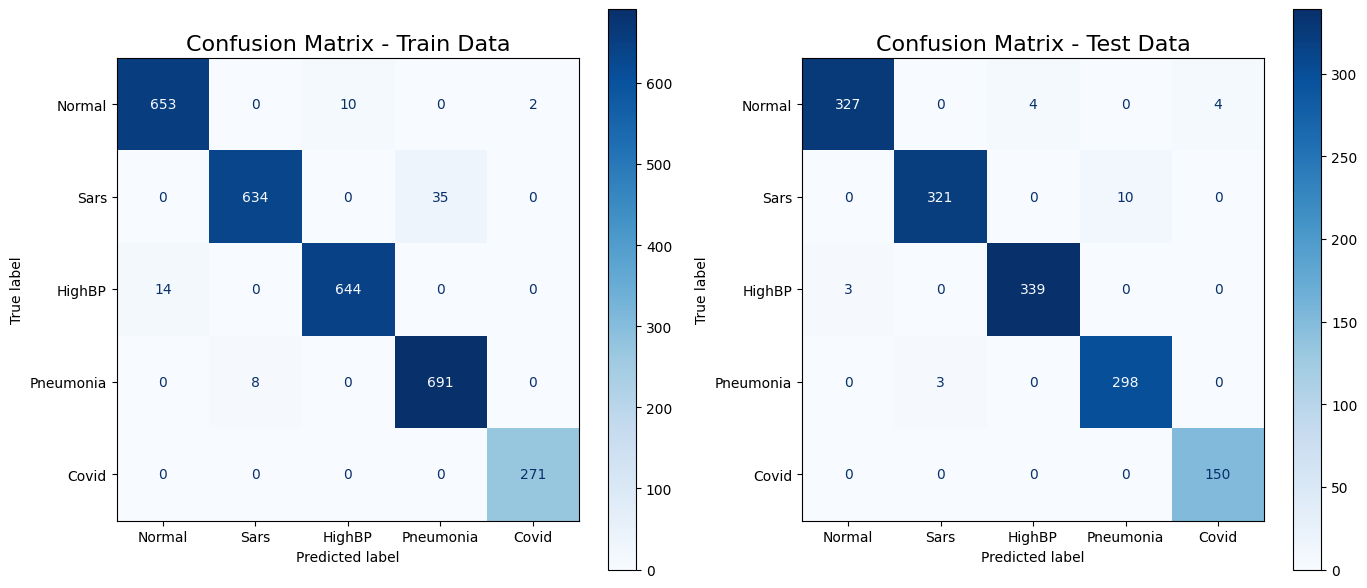

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Assuming df_to_train_lst is defined and works as expected
# Define your datasets
normal_agg = df_n_fuzzy_only.iloc[:,37]
sars_agg = df_s_fuzzy_only.iloc[:,37]
highbp_agg = df_highbp_fuzzy_only.iloc[:,37]
penumonia_agg = df_penumonia_fuzzy_only.iloc[:,37]
cvoid_data_fuzzy_agg = covid_data_fuzzy_only.iloc[:,37]

# For least accuracy (uncomment if needed)
# normal_agg = df_n_fuzzy_only.iloc[:,62]
# sars_agg = df_s_fuzzy_only.iloc[:,62]
# highbp_agg = df_highbp_fuzzy_only.iloc[:,62]
# penumonia_agg = df_penumonia_fuzzy_only.iloc[:,62]
# cvoid_data_fuzzy_agg = covid_data_fuzzy_only.iloc[:,62]

# Convert data to training format
normal_agg_X, normal_agg_y = df_to_train_lst(normal_agg, 0)
sars_agg_X, sars_agg_y = df_to_train_lst(sars_agg, 1)
highbp_agg_X, highbp_agg_y = df_to_train_lst(highbp_agg, 2)
penumonia_agg_X, penumonia_agg_y = df_to_train_lst(penumonia_agg, 3)
cvoid_data_fuzzy_agg_X, cvoid_data_fuzzy_agg_y = df_to_train_lst(cvoid_data_fuzzy_agg, 4)

# Combine all datasets
X = normal_agg_X + sars_agg_X + highbp_agg_X + penumonia_agg_X + cvoid_data_fuzzy_agg_X
y = normal_agg_y + sars_agg_y + highbp_agg_y + penumonia_agg_y + cvoid_data_fuzzy_agg_y

# Check lengths
assert len(X) == len(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Initialize and train the classifier
n_neighbors = 5
neigh = KNeighborsClassifier(n_neighbors)
neigh.fit(X_train, y_train)

# Predict labels for training and test data
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)



# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot confusion matrix for training data
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Normal', 'Sars', 'HighBP', 'Pneumonia', 'Covid'])
train_im = disp_train.plot(cmap=plt.cm.Blues, ax=axes[0], colorbar=True)
axes[0].set_title('Confusion Matrix - Train Data', fontsize=16)

# Plot confusion matrix for test data
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Normal', 'Sars', 'HighBP', 'Pneumonia', 'Covid'])
test_im = disp_test.plot(cmap=plt.cm.Blues, ax=axes[1], colorbar=True)
axes[1].set_title('Confusion Matrix - Test Data', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0) 
plt.show()



# # Plot confusion matrix for training data
# disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Normal','Sars','HighBP','Pneumonia','Covid'])
# disp_train.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix - Train Data')
# plt.show()

# # Plot confusion matrix for test data
# disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Normal','Sars','HighBP','Pneumonia','Covid'])
# disp_test.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix - Test Data')
# plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_10380\4189121485.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(range(len(x_set[y_set==j])),x_set[y_set==j],c=ListedColormap(('red', 'green','purple','yellow','blue'))(i),label = j)


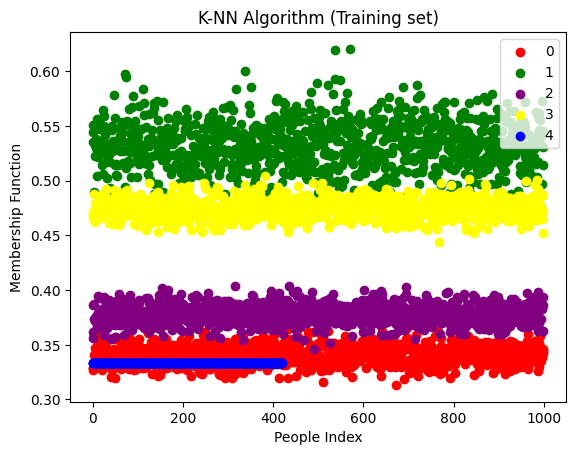

In [29]:
#Visulaizing the trianing set result
import numpy as np 
import pandas as pd
from matplotlib.colors import ListedColormap
x_set,y_set = np.array(X),np.array(y)
#start = np.array(min(x_set))-1
#x=np.meshgrid(np.arange(start = np.array(min(x_set)) - 1, stop = np.array(max(x_set)) + 1, step = 0.01))

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(range(len(x_set[y_set==j])),x_set[y_set==j],c=ListedColormap(('red', 'green','purple','yellow','blue'))(i),label = j)
    plt.title('K-NN Algorithm (Training set)')
    plt.xlabel('People Index')
    plt.ylabel('Membership Function')
    plt.legend()
    plt.show

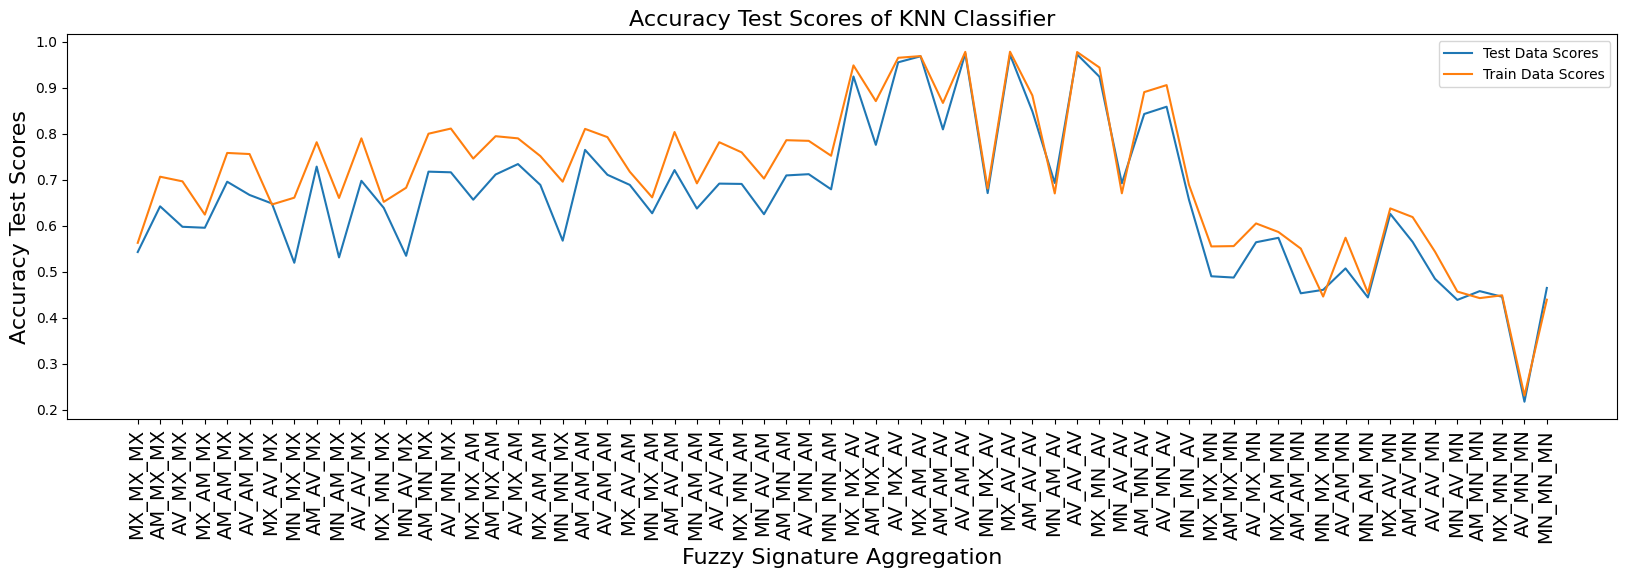

In [32]:
# plotting the accuracy test scores of KNN
import pandas as pd


file_path= 'G:\\fuzzy signature code\\KNN_test.csv'

acc_data = pd.read_csv(file_path)

plt.plot(range(64), acc_data.iloc[:,2],label='Test Data Scores')
plt.plot(range(64), acc_data.iloc[:,3],label='Train Data Scores')
plt.legend()
plt.ylabel('Accuracy Test Scores', fontsize= 16)
plt.xlabel('Fuzzy Signature Aggregation', fontsize= 16)
plt.title("Accuracy Test Scores of KNN Classifier", fontsize= 16)
plt.xticks(range(64), index_ordered, rotation ='vertical',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0) 
plt.show()

In [33]:
# Implementation of SVM algorithm
from sklearn import svm

test_score=[]

for i in range(64):

    normal_agg = df_n_fuzzy_only.iloc[:,i]
    sars_agg = df_s_fuzzy_only.iloc[:,i]
    highbp_agg = df_highbp_fuzzy_only.iloc[:,i]
    penumonia_agg = df_penumonia_fuzzy_only.iloc[:,i]
    cvoid_data_fuzzy_agg = covid_data_fuzzy_only.iloc[:,i]



    normal_agg_X           , normal_agg_y           = df_to_train_lst(normal_agg , 0)
    sars_agg_X             , sars_agg_y             = df_to_train_lst(sars_agg , 1)
    highbp_agg_X           , highbp_agg_y           = df_to_train_lst(highbp_agg , 2)
    penumonia_agg_X        , penumonia_agg_y        = df_to_train_lst(penumonia_agg , 3)
    cvoid_data_fuzzy_agg_X , cvoid_data_fuzzy_agg_y = df_to_train_lst(cvoid_data_fuzzy_agg , 4)

    X = normal_agg_X + sars_agg_X + highbp_agg_X + penumonia_agg_X + cvoid_data_fuzzy_agg_X
    y = normal_agg_y + sars_agg_y + highbp_agg_y + penumonia_agg_y + cvoid_data_fuzzy_agg_y

    assert (X.__len__() == y.__len__())

    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)
    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X_train,y_train)

    # predicting the output and printing the accuracy of the model
    classifier_predictions = clf.predict(X_test)
    acc_score = accuracy_score(y_test,classifier_predictions)
    test_score.append(acc_score)

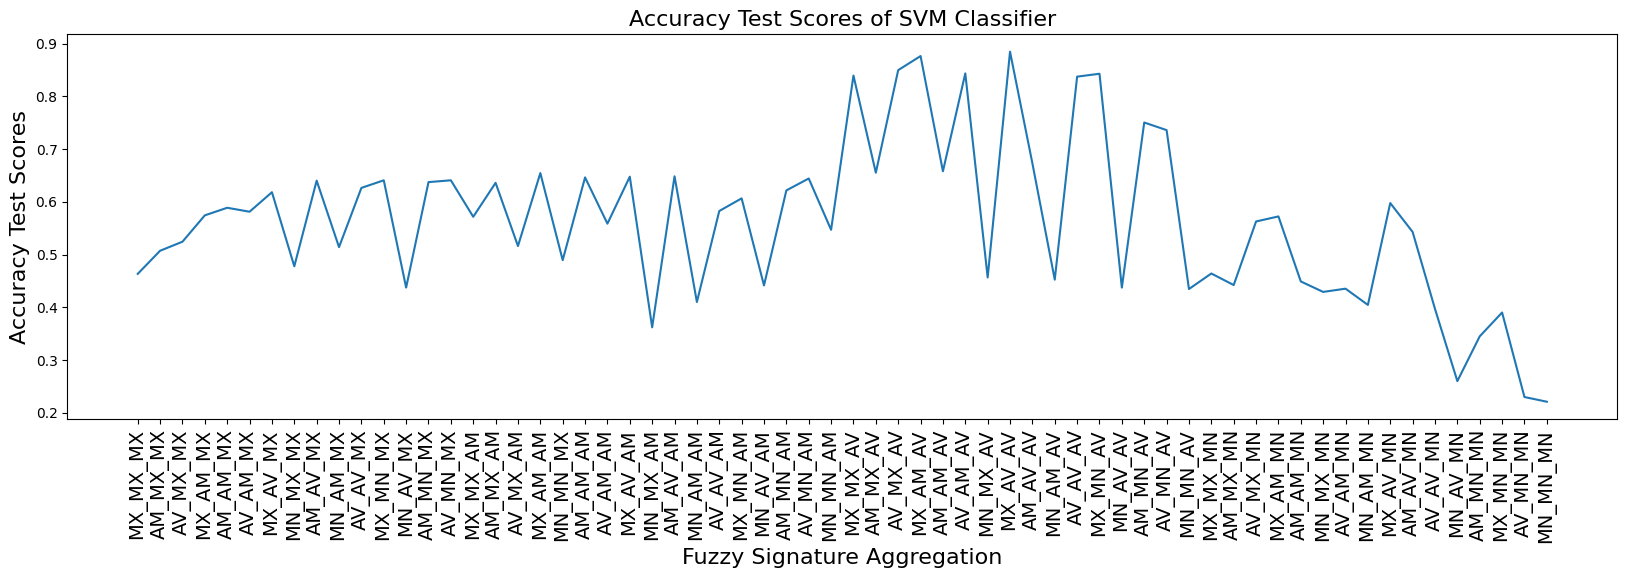

In [35]:
# plotting the accuracy test scores of SVM

plt.plot(range(64), test_score)
plt.ylabel('Accuracy Test Scores', fontsize=16)
plt.xlabel('Fuzzy Signature Aggregation', fontsize= 16)
plt.title("Accuracy Test Scores of SVM Classifier", fontsize= 16)
plt.xticks(range(64), index_ordered, rotation ='vertical',fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.savefig(file_path_figs, format='pdf', dpi=600, bbox_inches='tight', pad_inches=0) 
plt.show()

In [ ]:
print(index_ordered[test_score.index(max(test_score))])
print(index_ordered[test_score.index(min(test_score))])

MX_AM_AV
MN_MN_MN


In [ ]:
min(test_score)

In [ ]:
test_score.index(max(test_score))

/home/ruchira/anaconda3/envs/caffe37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/home/ruchira/anaconda3/envs/caffe37/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


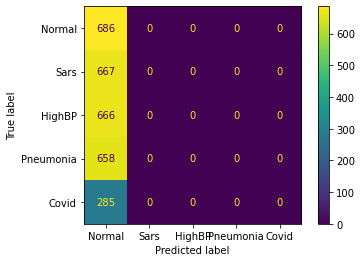

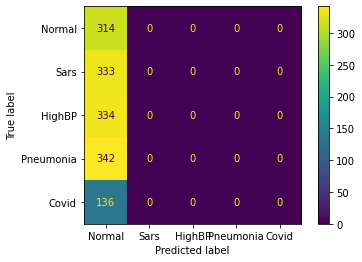

In [ ]:
# Convolution Matrices for SVM algorithm
from sklearn import svm

normal_agg = df_n_fuzzy_only.iloc[:,62]
sars_agg = df_s_fuzzy_only.iloc[:,62]
highbp_agg = df_highbp_fuzzy_only.iloc[:,62]
penumonia_agg = df_penumonia_fuzzy_only.iloc[:,62]
cvoid_data_fuzzy_agg = covid_data_fuzzy_only.iloc[:,62]



normal_agg_X           , normal_agg_y           = df_to_train_lst(normal_agg , 0)
sars_agg_X             , sars_agg_y             = df_to_train_lst(sars_agg , 1)
highbp_agg_X           , highbp_agg_y           = df_to_train_lst(highbp_agg , 2)
penumonia_agg_X        , penumonia_agg_y        = df_to_train_lst(penumonia_agg , 3)
cvoid_data_fuzzy_agg_X , cvoid_data_fuzzy_agg_y = df_to_train_lst(cvoid_data_fuzzy_agg , 4)

X = normal_agg_X + sars_agg_X + highbp_agg_X + penumonia_agg_X + cvoid_data_fuzzy_agg_X
y = normal_agg_y + sars_agg_y + highbp_agg_y + penumonia_agg_y + cvoid_data_fuzzy_agg_y

assert (X.__len__() == y.__len__())

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train,y_train)
    
#confusion matrix for train data
plot_confusion_matrix(clf, X_train, y_train , display_labels=['Normal','Sars','HighBP','Pneumonia','Covid'])

#confusion matrix for test data
plot_confusion_matrix(clf, X_test, y_test , display_labels=['Normal','Sars','HighBP','Pneumonia','Covid'])